In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt

In [3]:
# Size of the resize images
SIZE = 128

# Train
# Get Train Images from folder train and append them to train_images while the file name inside train folder which are labels are append into train_labels
train_images = []
train_labels = []
for directory_path in glob.glob("dataset/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

ripe
dataset/train\ripe\ripe(1).jpg
dataset/train\ripe\ripe(10).jpg
dataset/train\ripe\ripe(100).jpg
dataset/train\ripe\ripe(101).jpg
dataset/train\ripe\ripe(102).jpg
dataset/train\ripe\ripe(103).jpg
dataset/train\ripe\ripe(104).jpg
dataset/train\ripe\ripe(106).jpg
dataset/train\ripe\ripe(107).jpg
dataset/train\ripe\ripe(108).jpg
dataset/train\ripe\ripe(109).jpg
dataset/train\ripe\ripe(11).jpg
dataset/train\ripe\ripe(111).jpg
dataset/train\ripe\ripe(112).jpg
dataset/train\ripe\ripe(114).jpg
dataset/train\ripe\ripe(115).jpg
dataset/train\ripe\ripe(117).jpg
dataset/train\ripe\ripe(119).jpg
dataset/train\ripe\ripe(12).jpg
dataset/train\ripe\ripe(120).jpg
dataset/train\ripe\ripe(121).jpg
dataset/train\ripe\ripe(122).jpg
dataset/train\ripe\ripe(13).jpg
dataset/train\ripe\ripe(14).jpg
dataset/train\ripe\ripe(15).jpg
dataset/train\ripe\ripe(16).jpg
dataset/train\ripe\ripe(17).jpg
dataset/train\ripe\ripe(18).jpg
dataset/train\ripe\ripe(19).jpg
dataset/train\ripe\ripe(2).jpg
dataset/train\ripe\

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
# Test
# Get Test Images from folder test and append them to tesr_images while the file name inside test folder which are labels are append into test_labels
test_images = []
test_labels = []
for directory_path in glob.glob("dataset/test/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

ripe
dataset/test\ripe\ripe(105).jpg
dataset/test\ripe\ripe(110).jpg
dataset/test\ripe\ripe(113).jpg
dataset/test\ripe\ripe(116).jpg
dataset/test\ripe\ripe(118).jpg
dataset/test\ripe\ripe(26).jpg
dataset/test\ripe\ripe(28).jpg
dataset/test\ripe\ripe(39).jpg
dataset/test\ripe\ripe(41).jpg
dataset/test\ripe\ripe(45).jpg
dataset/test\ripe\ripe(46).jpg
dataset/test\ripe\ripe(47).jpg
dataset/test\ripe\ripe(5).jpg
dataset/test\ripe\ripe(55).jpg
dataset/test\ripe\ripe(68).jpg
dataset/test\ripe\ripe(71).jpg
dataset/test\ripe\ripe(72).jpg
dataset/test\ripe\ripe(81).jpg
dataset/test\ripe\ripe(88).jpg
dataset/test\ripe\ripe(90).jpg
dataset/test\ripe\ripe(93).jpg
dataset/test\ripe\ripe(95).jpg
dataset/test\ripe\ripe(96).jpg
dataset/test\ripe\ripe(97).jpg
unripe
dataset/test\unripe\unripe(10).jpg
dataset/test\unripe\unripe(102).jpg
dataset/test\unripe\unripe(11).jpg
dataset/test\unripe\unripe(14).jpg
dataset/test\unripe\unripe(2).jpg
dataset/test\unripe\unripe(22).jpg
dataset/test\unripe\unripe(30)

In [6]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
# encode labels from string to int
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
x_train = train_images
y_train = train_labels_encoded
x_test = test_images
y_test = test_labels_encoded

In [9]:
# normalize pixel values between 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# One hot encode y values for CNN
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# feature extractor
activation = 'sigmoid'

# Multiple layers of CNNs nets
# initialize the model
feature_extractor = Sequential()

# First layer
# Convolution layer with 32 filters, (3,3) kernel size
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

# Second layer
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
# Max poolung with no stride and no padding for downsampling
feature_extractor.add(MaxPooling2D())

# Third layer
feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

# Forth layer
feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

# flatten into 1 column
feature_extractor.add(Flatten())

# CNN Model

In [12]:
# Add dense layer
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(2, activation = 'softmax')(x)

In [13]:
# Make cnn model combining both feature extractor and dense layer
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)       

In [14]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))

Epoch 1/50
6/6 [==============================] - 14s 2s/step - loss: 1.5617 - accuracy: 0.7017 - val_loss: 3.6819 - val_accuracy: 0.5333
Epoch 2/50
6/6 [==============================] - 13s 2s/step - loss: 0.6748 - accuracy: 0.8398 - val_loss: 3.3693 - val_accuracy: 0.5333
Epoch 3/50
6/6 [==============================] - 13s 2s/step - loss: 0.2803 - accuracy: 0.8950 - val_loss: 3.4199 - val_accuracy: 0.5333
Epoch 4/50
6/6 [==============================] - 14s 2s/step - loss: 0.2057 - accuracy: 0.9171 - val_loss: 3.3656 - val_accuracy: 0.5333
Epoch 5/50
6/6 [==============================] - 14s 2s/step - loss: 0.2238 - accuracy: 0.8950 - val_loss: 3.0526 - val_accuracy: 0.5333
Epoch 6/50
6/6 [==============================] - 13s 2s/step - loss: 0.1436 - accuracy: 0.9558 - val_loss: 3.1626 - val_accuracy: 0.5333
Epoch 7/50
6/6 [==============================] - 13s 2s/step - loss: 0.1705 - accuracy: 0.9392 - val_loss: 2.1937 - val_accuracy: 0.5333
Epoch 8/50
6/6 [==================

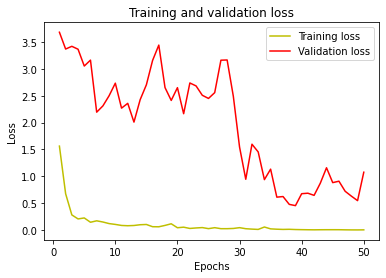

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

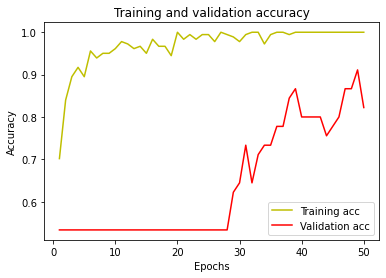

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

In [18]:
cm = confusion_matrix(test_labels, prediction_NN)

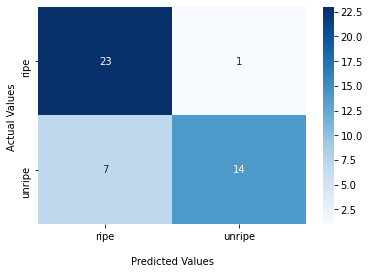

In [19]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ripe','unripe'])
ax.yaxis.set_ticklabels(['ripe','unripe'])

## Display the visualization of the Confusion Matrix.
plt.show()

<Figure size 864x576 with 0 Axes>

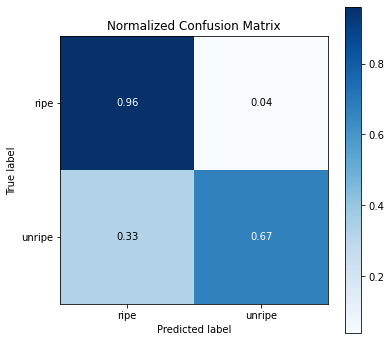

In [20]:
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(6,6))
skplt.metrics.plot_confusion_matrix(test_labels, prediction_NN, normalize='true',ax=ax)
plt.show()

In [21]:
print(classification_report(test_labels, prediction_NN))

              precision    recall  f1-score   support

        ripe       0.77      0.96      0.85        24
      unripe       0.93      0.67      0.78        21

    accuracy                           0.82        45
   macro avg       0.85      0.81      0.81        45
weighted avg       0.84      0.82      0.82        45



The prediction for this image is:  ['ripe']
The actual label for this image is:  ripe


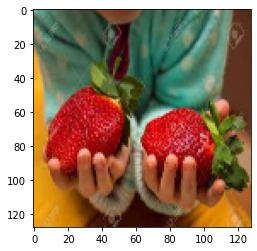

In [22]:
# test prediction
n=17  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['ripe']
The actual label for this image is:  ripe


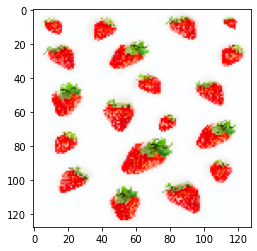

In [23]:
n=2  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['unripe']
The actual label for this image is:  unripe


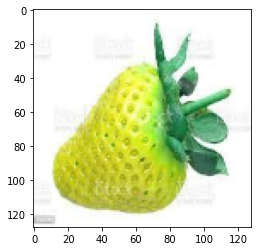

In [24]:
n=30  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

# Random Forest Classifier Model

In [25]:
# Out X input to random forest
# send the x for train through the layers as feature extractor
X_for_RF = feature_extractor.predict(x_train)

In [26]:
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [27]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [28]:
# send data to same feature extractor as train
X_test_feature = feature_extractor.predict(x_test)

In [29]:
prediction_RF = RF_model.predict(X_test_feature)

In [30]:
prediction_RF = le.inverse_transform(prediction_RF)

In [31]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9333333333333333


In [32]:
cm = confusion_matrix(test_labels, prediction_RF)

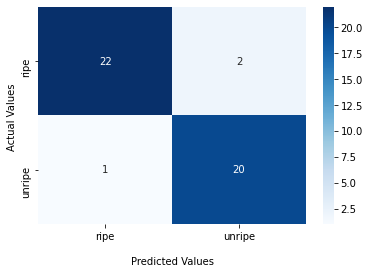

In [33]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ripe','unripe'])
ax.yaxis.set_ticklabels(['ripe','unripe'])

## Display the visualization of the Confusion Matrix.
plt.show()

<Figure size 864x576 with 0 Axes>

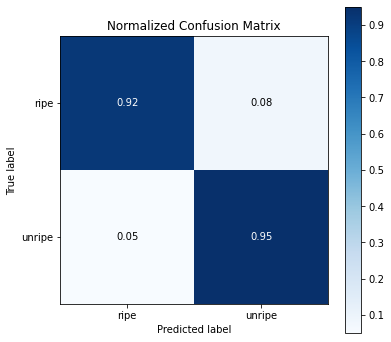

In [34]:
prediction_RF = RF_model.predict(X_test_feature)
prediction_RF = le.inverse_transform(prediction_RF)

plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(6,6))
skplt.metrics.plot_confusion_matrix(test_labels, prediction_RF, normalize='true',ax=ax)
plt.show()

In [35]:
print(classification_report(test_labels, prediction_RF))

              precision    recall  f1-score   support

        ripe       0.96      0.92      0.94        24
      unripe       0.91      0.95      0.93        21

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



The prediction for this image is:  ['ripe']
The actual label for this image is:  ripe


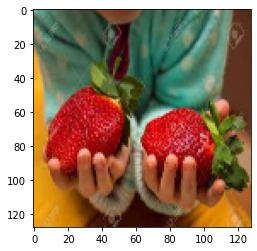

In [36]:
# test prediction
n=17 
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['ripe']
The actual label for this image is:  ripe


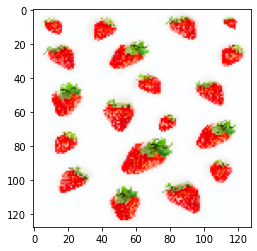

In [37]:
n=2 
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['unripe']
The actual label for this image is:  unripe


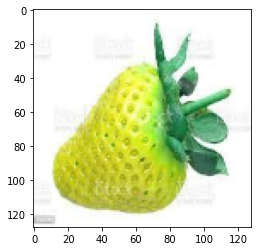

In [38]:
n=30 
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])